## Master thesis: Nissan Sales Forecasting in Finland using Machine Learning

### Install Required Libraries:

* Lib 1 
* Lib 2

In [61]:
# Install statsmodels
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [54]:
##########################
# Import libraries
##########################

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import glob
import time

import matplotlib.dates as mdates

plt.rcParams["figure.figsize"] = [16, 9]

##########################
# Define global variables
##########################

# Input filename, path to source files and output filename
input_files = "Retails_CY*.xls*"
sales_channel_file = "SalesChannels.xlsx"
path = 'D:/Git_Projects/5. Master_thesis/Data/'
filename = path + 'Retails_ALL_CY11_CY22.xlsx'

### Loading data:

#### 1. Merging files into one single Excel file

* This step is only required once

In [2]:
# List excel files in the path
file_list = glob.glob(path + input_files)

# list of excel files we want to merge.
# pd.read_excel(file_path) reads the 
# excel data into pandas dataframe.
excl_list = []

print("Reading files....\n") 
start_time = time.time()

for file in file_list:
    print(file)
    excl_list.append(pd.read_excel(file))
 
# concatenate all DataFrames in the list
# into a single DataFrame, returns new
# DataFrame.
excl_merged = pd.concat(excl_list, ignore_index=True)
 
# exports the dataframe into excel file
# with specified name.
print('\nMerging %d files....\n' % len(file_list)) 
excl_merged.to_excel(filename, index=False)

end_time = time.time()
time_elapsed = end_time - start_time 
print('Completed in %f seconds.' % time_elapsed)

Reading files....

D:/Git_Projects/5. Master_thesis/Data\Retails_CY11.xls
D:/Git_Projects/5. Master_thesis/Data\Retails_CY12.xls
D:/Git_Projects/5. Master_thesis/Data\Retails_CY13.xls
D:/Git_Projects/5. Master_thesis/Data\Retails_CY14.xls
D:/Git_Projects/5. Master_thesis/Data\Retails_CY15.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY16.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY17.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY18.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY19.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY20.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY21.xlsx
D:/Git_Projects/5. Master_thesis/Data\Retails_CY22.xlsx

Merging 12 files....

Completed in 350.210272 seconds.


#### 2. Reading Exce File and loading content into Pandas dataframe

In [68]:
# Load files into a pandas dataframe
df = pd.concat(pd.read_excel(filename, sheet_name=None), ignore_index=True)
sales_channel_df = pd.concat(pd.read_excel(path + sales_channel_file, sheet_name=None), ignore_index=True)

In [70]:
# Preview dataframe
df

,vehOrderClassCode,RetailNSC,NSCModelGroupCode,ReportingModelGroup,orderNumber,FleetCode,DealerCodeRetail,orderCreatedDate,RetailCountry,RetailDate,...,FinancialOwnerCategoryCurrent,FinancialOwnerCategoryNext,RetailCount,VINCode,CustomerName,Month,ModelDescription,Quarter,TRIM,YEAR
0,U,37,F15,F15F,NNE0150004,NaN,130520,2010-06-17 09:38:00,DEN,02/01/2011 09:13:58,...,4,5,1,SJNFBAF15U6037010,NaN,Jan,NaN,NaN,NaN,NaN
1,B,37,D40,D40D,NNE0144170,011070,150110,2010-05-19 08:01:00,SWE,02/01/2011 15:12:15,...,4,5,1,VSKCAND40U0400996,GEA VVS,Jan,NaN,NaN,NaN,NaN
2,L,37,F15,F15F,NNE0161192,000194,160040,2010-10-15 14:44:00,FIN,03/01/2011 06:25:49,...,4,5,1,SJNFBAF15U6017454,Axus Finland/Via Tra,Jan,NaN,NaN,NaN,NaN
3,L,37,J10F,J10G,NNE0146363,000964,160040,2010-06-03 05:55:00,FIN,03/01/2011 06:28:35,...,4,5,1,SJNJAAJ10U7038560,Nordea Rahoitus/Icar,Jan,NaN,NaN,NaN,NaN
4,P,37,J10,J10B,NNE0147851,NaN,160230,2010-06-08 13:04:00,FIN,03/01/2011 06:30:20,...,4,5,1,SJNFAAJ10U2197900,KEMPPAINEN MATTI,Jan,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465355,D,37,ZE1,ZE1A,NNE0646910,,151090,2022-03-02 07:49:21,SWE,01/08/2022 06:35:16,...,4,5,1,SJNFAAZE1U0165641,DEMO NORRKÄPING,August,NaN,Q2,NaN,2022.0
465356,P,37,ZE1,ZE1A,NNE0646922,,140240,2022-03-02 09:24:37,NOR,29/08/2022 08:58:14,...,4,5,1,SJNFAAZE1U0167182,Mikalsen,August,NaN,Q2,NaN,2022.0
465357,P,37,ZE1,ZE1A,NNE0646927,,140380,2022-03-02 09:47:36,NOR,15/08/2022 14:35:03,...,4,5,1,SJNFAAZE1U0166106,Eskilt,August,NaN,Q2,NaN,2022.0
465358,L,37,ZE1,ZE1A,NNE0647072,021717,151010,2022-03-04 10:09:25,SWE,10/08/2022 08:28:45,...,4,5,1,SJNFAAZE1U0165614,Carina Flygholm,August,NaN,Q2,NaN,2022.0


In [57]:
# Preview dataframe
sales_channel_df

,vehOrderClassCode,VehicleSalesChannelDesc
0,B,B2B
1,C,DEALER FLEET / GOVERNMENT
2,D,CAPTIVE
3,E,PRIVATE
4,F,RENTAL
5,G,DIRECT FLEET / GOVERNMENT
6,H,PRIVATE
7,L,DEALER FLEET / GOVERNMENT
8,LB,DEALER FLEET / GOVERNMENT
9,N,RENTAL


In [73]:
sales_channel_df['vehOrderClassCode'] = sales_channel_df['vehOrderClassCode'].str.replace(" ", "")
df['vehOrderClassCode'] = df['vehOrderClassCode'].str.replace(" ", "")

In [76]:
# Merge both dataframes
#data = pd.merge(sales_channel_df, df, on='vehOrderClassCode', how='outer')
#data = df.join ( sales_channel_df.set_index( [ 'vehOrderClassCode' ], verify_integrity=True ), on=[ 'vehOrderClassCode' ], how='inner' )
#data = df.merge(sales_channel_df, left_on='vehOrderClassCode', right_on='vehOrderClassCode')
#data = df.merge(sales_channel_df, left_on='vehOrderClassCode', right_on='vehOrderClassCode', suffixes=('_left', '_right'))
data = df.merge(sales_channel_df, 
                      on = "vehOrderClassCode", 
                      indicator = True)


In [78]:
# Preview dataframe
#data['vehOrderClassCode'].unique()
data

,vehOrderClassCode,RetailNSC,NSCModelGroupCode,ReportingModelGroup,orderNumber,FleetCode,DealerCodeRetail,orderCreatedDate,RetailCountry,RetailDate,...,RetailCount,VINCode,CustomerName,Month,ModelDescription,Quarter,TRIM,YEAR,VehicleSalesChannelDesc,_merge
0,U,37,F15,F15F,NNE0150004,NaN,130520,2010-06-17 09:38:00,DEN,02/01/2011 09:13:58,...,1,SJNFBAF15U6037010,NaN,Jan,NaN,NaN,NaN,NaN,UNSOLD,both
1,U,37,E11,E11B,NNE0159174,NaN,130100,2010-09-27 09:24:00,DEN,02/02/2011 07:53:43,...,-1,SJNFAAE11U2090591,NaN,Feb,NaN,NaN,NaN,NaN,UNSOLD,both
2,U,37,F15,F15F,NNE0169198,NaN,150910,2011-01-12 09:06:00,SWE,21/02/2011 15:51:12,...,1,SJNFBAF15U6053354,NaN,Feb,NaN,NaN,NaN,NaN,UNSOLD,both
3,U,37,F15,F15F,NNE0169198,NaN,150910,2011-01-12 09:06:00,SWE,24/02/2011 15:57:56,...,-1,SJNFBAF15U6053354,NaN,Feb,NaN,NaN,NaN,NaN,UNSOLD,both
4,U,37,J10F,J10G,NNE0162375,NaN,159999,2010-10-26 09:03:00,SWE,08/04/2011 11:12:49,...,-1,SJNJBNJ10U7045380,NaN,Apr,NaN,NaN,NaN,NaN,UNSOLD,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465355,LB,37,ZE1,ZE1A,NNE0524398,NaN,151024,43355.502002,SWE,30/04/2019 07:49:29,...,1,SJNFAAZE1U0045235,NJUDUNG ENERGI VETLA,Apr,NaN,Q1,151024.0,NaN,DEALER FLEET / GOVERNMENT,both
465356,LB,37,ZE1,ZE1A,NNE0523178,NaN,151024,43348.427361,SWE,30/04/2019 08:15:44,...,1,SJNFAAZE1U0043713,Carl Sollin,Apr,NaN,Q1,151024.0,NaN,DEALER FLEET / GOVERNMENT,both
465357,LB,37,ZE1,ZE1A,NNE0555437,NaN,150970,2019-06-04 15:57:46,SWE,31/07/2019 15:01:29,...,1,SJNFAAZE1U0072417,Anneli Wikner,Jul,NaN,Q2,150970.0,NaN,DEALER FLEET / GOVERNMENT,both
465358,LB,37,J11B,J11B,NNE0606639,NaN,130120,2020-10-29 12:08:05,DEN,23/02/2021 12:51:35,...,1,SJNFFAJ11U2943181,NaN,Feb,NaN,Q4,NaN,2021.0,DEALER FLEET / GOVERNMENT,both


In [79]:
# Preview dataframe columns
data.columns

Index(['vehOrderClassCode', 'RetailNSC', 'NSCModelGroupCode',
       'ReportingModelGroup', 'orderNumber', 'FleetCode', 'DealerCodeRetail',
       'orderCreatedDate', 'RetailCountry', 'RetailDate', 'ModelGroup',
       'EndItem', 'EIColourCode', 'DealerDeliveryAddrNoRetail',
       'FinancialOwnerCategoryCurrent', 'FinancialOwnerCategoryNext',
       'RetailCount', 'VINCode', 'CustomerName', 'Month', 'ModelDescription',
       'Quarter', 'TRIM', 'YEAR', 'VehicleSalesChannelDesc', '_merge'],
      dtype='object')

In [80]:
# Create a copy
df_Finland = data

In [82]:
pd.set_option('mode.chained_assignment', None)

# Get only Finland orders
df_Finland = df_Finland[df_Finland.RetailCountry == 'FIN']

# Remove duplicates
df_Finland.drop_duplicates(subset=['orderNumber'], keep='last', inplace=True)

# Remove unnecessary columns
df_Finland.drop(['vehOrderClassCode', 'RetailNSC', 'NSCModelGroupCode',
       'ReportingModelGroup', 'FleetCode', 'DealerCodeRetail',
       'orderCreatedDate', 'RetailCountry', 'ModelGroup',
       'EndItem', 'EIColourCode', 'DealerDeliveryAddrNoRetail',
       'FinancialOwnerCategoryCurrent', 'FinancialOwnerCategoryNext',
       'RetailCount', 'VINCode', 'CustomerName', 'Month', 'ModelDescription',
       'Quarter', 'TRIM', 'YEAR'], axis=1, inplace=True)

# Convert datetime column to just date
df_Finland['RetailDate'] = pd.to_datetime(df_Finland['RetailDate'], dayfirst=True).dt.date
df_Finland['year'] = pd.DatetimeIndex(df_Finland['RetailDate']).year
df_Finland['month'] = pd.DatetimeIndex(df_Finland['RetailDate']).month

In [83]:
df_Finland

,orderNumber,RetailDate,VehicleSalesChannelDesc,_merge,year,month
1482,NNE0147856,2011-01-03,B2B,both,2011,1
1484,NNE0136566,2011-01-03,B2B,both,2011,1
1489,NNE0165059,2011-01-04,B2B,both,2011,1
1493,NNE0151580,2011-01-04,B2B,both,2011,1
1501,NNE0155340,2011-01-05,B2B,both,2011,1
...,...,...,...,...,...,...
462544,NNE0593470,2021-01-23,PRIVATE,both,2021,1
463219,NNE0420173,2017-02-17,DEALER FLEET / GOVERNMENT,both,2017,2
463254,NNE0420332,2017-02-28,DEALER FLEET / GOVERNMENT,both,2017,2
463409,NNE0362083,2017-03-29,DEALER FLEET / GOVERNMENT,both,2017,3


In [84]:
df_Finland['VehicleSalesChannelDesc'].unique()

array(['B2B                           ', 'DEALER FLEET / GOVERNMENT     ',
       'PRIVATE                       ', 'CAPTIVE                       ',
       'RENTAL                        '], dtype=object)

In [85]:
df_Finland.to_excel("output.xlsx")  

In [86]:
# Using groupby() and count()
result = df_Finland.groupby(['year', 'month', 'VehicleSalesChannelDesc']).size().reset_index(name='Orders')
result['Date'] = pd.to_datetime(result[['year', 'month']].assign(DAY=1))
result.drop(['year', 'month'], axis=1, inplace=True)
result = result.set_index("Date")

In [89]:
result.head(50)

,VehicleSalesChannelDesc,Orders
Date,,
2011-01-01,B2B,37
2011-01-01,CAPTIVE,132
2011-01-01,DEALER FLEET / GOVERNMENT,98
2011-01-01,PRIVATE,632
2011-01-01,RENTAL,1
2011-02-01,B2B,34
2011-02-01,CAPTIVE,108
2011-02-01,DEALER FLEET / GOVERNMENT,78
2011-02-01,PRIVATE,450


VehicleSalesChannelDesc
B2B                               AxesSubplot(0.125,0.2;0.775x0.68)
CAPTIVE                           AxesSubplot(0.125,0.2;0.775x0.68)
DEALER FLEET / GOVERNMENT         AxesSubplot(0.125,0.2;0.775x0.68)
PRIVATE                           AxesSubplot(0.125,0.2;0.775x0.68)
RENTAL                            AxesSubplot(0.125,0.2;0.775x0.68)
Name: Orders, dtype: object

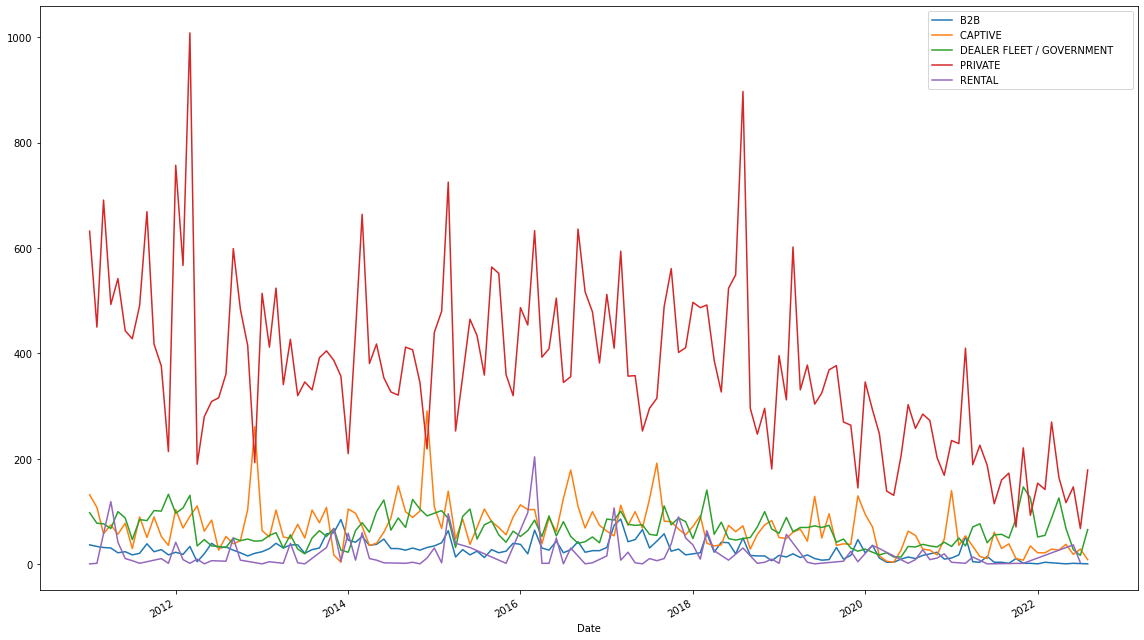

In [93]:
result.groupby('VehicleSalesChannelDesc')['Orders'].plot(legend=True)

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


TypeError: unhashable type: 'numpy.ndarray'

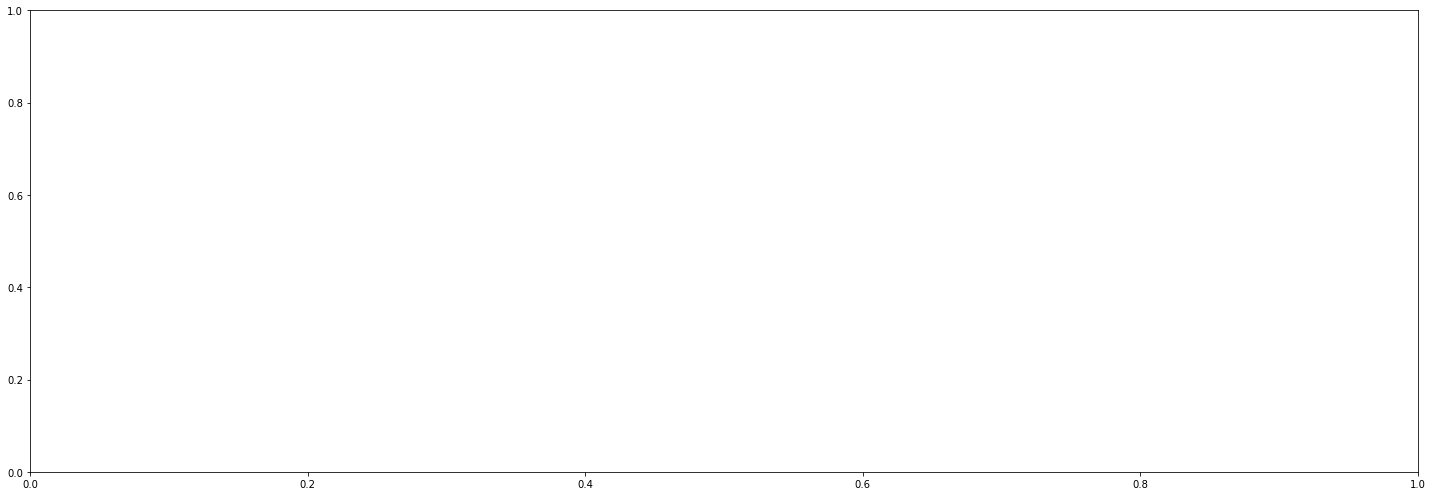

In [94]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m') #This is a format.
fig, axes = plt.subplots(figsize=(20,7))

plt.plot(result['Orders'], label = 'Orders', marker = 'o')

axes.xaxis.set_major_locator(months)
axes.xaxis.set_major_formatter(years_fmt)
axes.xaxis.set_minor_locator(months)

# Autolayout
plt.rcParams["figure.autolayout"] = True

# Set the font size of xticks
plt.xticks(fontsize=8)
plt.xticks(rotation = 'vertical')
plt.show()

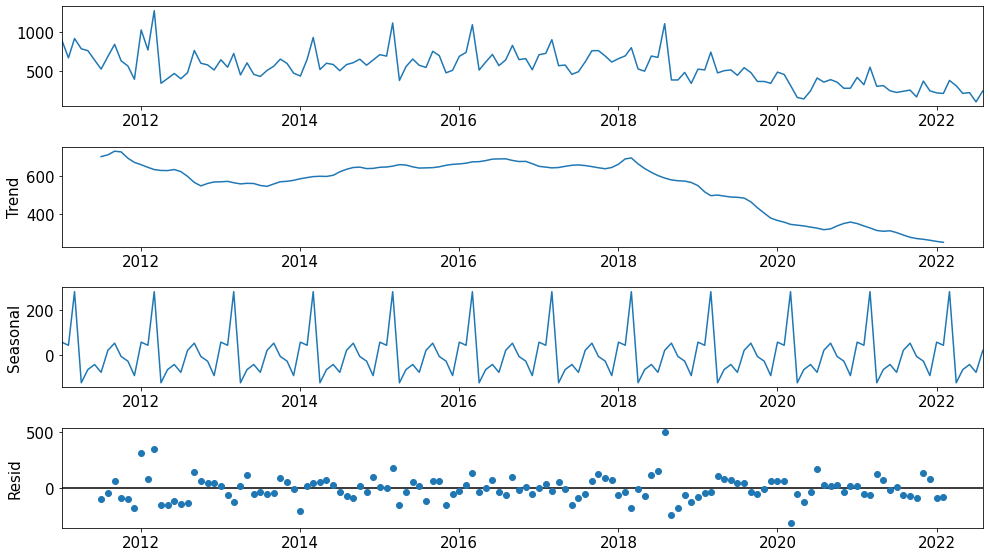

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rc('figure',figsize=(14,8))
plt.rc('font',size=15)

output = seasonal_decompose(result[result["P"] > 35],model='additive')
fig = output.plot()

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


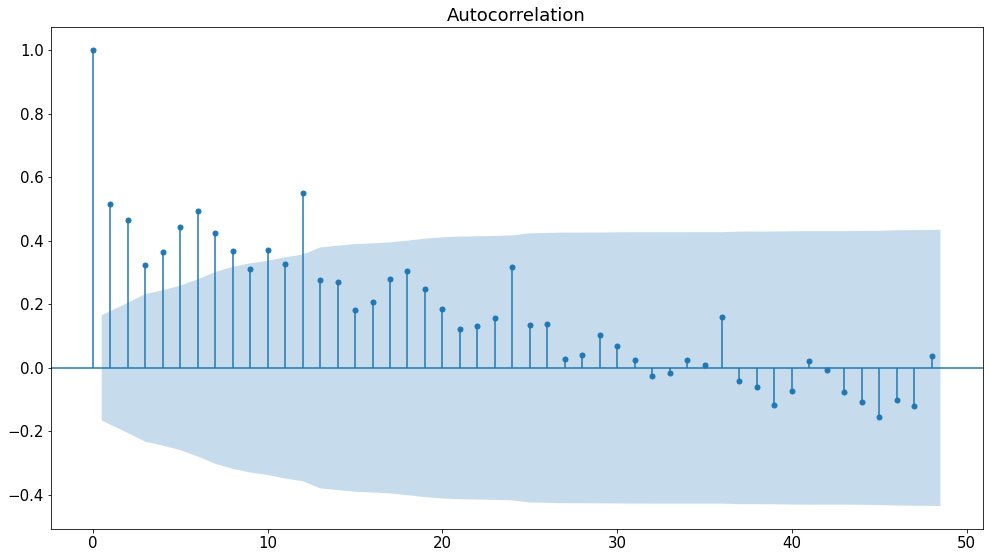

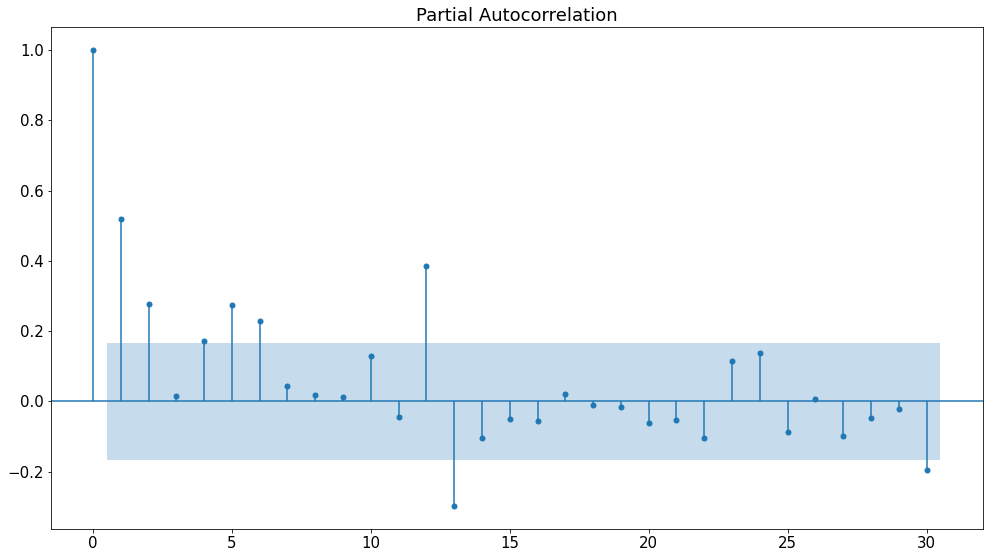

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(result['Orders'], lags=48);
plot_pacf(result['Orders'], lags=30);

In [21]:
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(result['Orders'], order=(12,1,1))
predictions = arima.fit().predict()

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

AttributeError: 'pandas._libs.properties.CachedProperty' object has no attribute 'func'